In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import csv


In [2]:
# Enlarge jupyter output layout
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
Top2Vec = pd.read_csv("output\Top2Vec_output\document_cluster_Top2Vec_doc2vec_best.csv")
Top2Vec

Topic  Doc_ID                                              title  \
0         4       0  Breast Cancer Diagnosis Using Histopathology a...   
1         0       1      Role of Internet of Things in Global Business   
2         0       2  High-Performance Computing with Artificial Int...   
3         5       3  Development and performance of a HemeLB GPU co...   
4         4       4  Synthesizing realistic high-resolution retina ...   
...     ...     ...                                                ...   
2698      3    2698  Comparison of the Inhibition of Escherichia co...   
2699      6    2699  YALECG: A NEW SYSTEM FOR COMPUTER ANALYSIS OF ...   
2700      0    2700  The super-computer project: a case study of th...   
2701      6    2701  THREE-DIMENSIONAL RECONSTRUCTION AND DISPLAY O...   
2702      0    2702  HIGH PERFORMANCE COMPUTER PROGRAMS FOR RAPID A...   

                                            description  \
0     High-performance computer tools have been more...   
1     The paper aims at presenting Internet of Thing...   
2     A deadly virus that creates diseases in all li...   
3     In recent years, it has become increasingly co...   
4     Realistic image synthesis based on deep learni...   
...                                                 ...   
2698  The inhibition constants (Ki app) obtained fro...   
2699  YALECG is a new minicomputer system for the ra...   
2700  A major concern of the governments of industri...   
2701  The paper describes a special high performance...   
2702  A high performance computer system has been de...   

                                                    Doc publish_year_month  \
0     Breast Cancer Diagnosis Using Histopathology a...            2023/01   
1     Role of Internet of Things in Global Business....            2023/01   
2     High-Performance Computing with Artificial Int...            2023/01   
3     Development and performance of a HemeLB GPU co...            2023/01   
4     Synthesizing realistic high-resolution retina ...            2022/12   
...                                                 ...                ...   
2698  Comparison of the Inhibition of Escherichia co...            1982/01   
2699  YALECG: A NEW SYSTEM FOR COMPUTER ANALYSIS OF ...            1978/01   
2700  The super-computer project: a case study of th...            1977/01   
2701  THREE-DIMENSIONAL RECONSTRUCTION AND DISPLAY O...            1975/01   
2702  HIGH PERFORMANCE COMPUTER PROGRAMS FOR RAPID A...            1974/01   

      citeby_count  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
2698            77  
2699             9  
2700             3  
2701             2  
2702             5  

[2703 rows x 7 columns]

## Stacked Area Chart

In [4]:
pd.set_option('max_colwidth', 120)
# Merge topic modeling reuslts with medical categories (medical categories are defined mannully)
Top2Vec = pd.read_csv("output\Top2Vec_output\document_cluster_Top2Vec_doc2vec_best.csv")
Top2Vec_topicwords = pd.read_csv("output\Top2Vec_output\document_cluster_Top2Vec_doc2vec_topic_words_best.csv")

Top2Vec['publish_year']=Top2Vec['publish_year_month'].str[:4].astype(int)
Top2Vec_topicwords

Topic  \
0       0   
1       1   
2       2   
3       3   
4       4   
5       5   
6       6   
7       7   
8       8   
9       9   
10     10   

                                                                                                                topic_words  \
0   ['healthcare' 'big' 'health' 'electronic' 'government' 'services'\r\n 'infrastructure' 'sciences' 'internet' 'things...   
1   ['genome' 'sequencing' 'sequence' 'alignments' 'genomes' 'reads'\r\n 'assembly' 'read' 'alignment' 'sequences' 'dna'...   
2   ['fluid' 'stokes' 'navier' 'flow' 'equations' 'finite' 'numerical'\r\n 'element' 'blood' 'nonlinear' 'flows' 'geomet...   
3   ['drug' 'docking' 'ligand' 'compounds' 'binding' 'ligands' 'screening'\r\n 'inhibitors' 'molecular' 'protein' 'recep...   
4   ['convolutional' 'neural' 'cnn' 'classification' 'deep' 'diagnosis'\r\n 'detection' 'segmentation' 'trained' 'traini...   
5   ['reconstruction' 'gpu' 'cuda' 'projection' 'registration' 'tomography'\r\n 'image' 'gpus' 'ct' 'units' 'iterative' ...   
6   ['rendering' 'display' 'interactive' 'visualization' 'remote'\r\n 'workstation' 'video' 'surgical' 'imaging' 'image'...   
7   ['epidemic' 'influenza' 'spread' 'virus' 'pandemic' 'agent' 'social'\r\n 'viruses' 'viral' 'contact' 'realistic' 'in...   
8   ['brain' 'neuroimaging' 'fmri' 'eeg' 'neuroscience' 'connectivity'\r\n 'electrical' 'head' 'mri' 'functional' 'mappi...   
9   ['carlo' 'dose' 'monte' 'mc' 'radiation' 'radiotherapy' 'beam' 'photon'\r\n 'therapy' 'transport' 'calculation' 'tre...   
10  ['patients' 'age' 'risk' 'year' 'total' 'increased' 'surgical' 'day'\r\n 'procedures' 'who' 'population' 'utilizatio...   

                                                     topic_words_short  \
0          ['healthcare', 'big', 'health', 'electronic', 'government']   
1        ['genome', 'sequencing', 'sequence', 'alignments', 'genomes']   
2                   ['fluid', 'stokes', 'navier', 'flow', 'equations']   
3                ['drug', 'docking', 'ligand', 'compounds', 'binding']   
4         ['convolutional', 'neural', 'cnn', 'classification', 'deep']   
5      ['reconstruction', 'gpu', 'cuda', 'projection', 'registration']   
6   ['rendering', 'display', 'interactive', 'visualization', 'remote']   
7             ['epidemic', 'influenza', 'spread', 'virus', 'pandemic']   
8             ['brain', 'neuroimaging', 'fmri', 'eeg', 'neuroscience']   
9                        ['carlo', 'dose', 'monte', 'mc', 'radiation']   
10                        ['patients', 'age', 'risk', 'year', 'total']   

                                                                                                                word_scores  \
0   [0.345448   0.34309608 0.3307244  0.3195102  0.31479207 0.3128377\r\n 0.30854326 0.30258647 0.30057722 0.298524   0....   
1   [0.43621463 0.42941687 0.4237782  0.40520874 0.39250714 0.37716454\r\n 0.37040076 0.34125623 0.33148494 0.32579425 0...   
2   [0.52471495 0.50429314 0.49824628 0.49483234 0.48369738 0.47711438\r\n 0.4587536  0.41606617 0.3957294  0.39164382 0...   
3   [0.5211472  0.50374925 0.5006535  0.47035837 0.46758035 0.45620772\r\n 0.4545693  0.44611657 0.43898574 0.43444118 0...   
4   [0.44432506 0.4172657  0.3669326  0.32259622 0.31564638 0.2987711\r\n 0.29132563 0.28530806 0.27592602 0.25742197 0....   
5   [0.42177463 0.3914258  0.38027143 0.3559382  0.3305511  0.32391113\r\n 0.30727357 0.29312608 0.28433394 0.2728992  0...   
6   [0.38761225 0.3472688  0.34346452 0.3420436  0.2916162  0.27897748\r\n 0.25232384 0.24634387 0.23885202 0.22643659 0...   
7   [0.5503001  0.46940565 0.4669309  0.43493304 0.43148208 0.41315043\r\n 0.3795411  0.37868676 0.30492225 0.29709622 0...   
8   [0.5576418  0.5481104  0.46408147 0.45646447 0.4363974  0.35180187\r\n 0.29852176 0.2901367  0.28310105 0.2500428  0...   
9   [0.59207785 0.5888966  0.58212304 0.48499885 0.471718   0.45576796\r\n 0.45559302 0.4387303  0.43630323 0.41137728 0...   
10  [0.5224694  0.41543156 0.3816556

In [6]:
merge_result = pd.merge(Top2Vec, Top2Vec_topicwords, on="Topic")
merge_result_still2022 = merge_result[merge_result.publish_year != 2023]
merge_result_still2022

Topic  Doc_ID  \
1         4       4   
2         4       5   
3         4      18   
4         4      23   
5         4      25   
...     ...     ...   
2698      6    2675   
2699      6    2692   
2700      6    2697   
2701      6    2699   
2702      6    2701   

                                                                                                                        title  \
1       Synthesizing realistic high-resolution retina image by style-based generative adversarial network and its utilization   
2                                  A hybrid DL with the Internet of Things to monitor human activities using wearable sensors   
3                     Building High-Throughput Neural Architecture Search Workflows via a Decoupled Fitness Prediction Engine   
4                                 Neural Networks-Based On-Site Dermatologic Diagnosis through Hyperspectral Epidermal Images   
5     On the limits of Conditional Generative Adversarial Neural Networks to reconstruct the identification of inhabitants...   
...                                                                                                                       ...   
2698                                                                  Real time frequency domain processing of medical images   
2699                                                                       Database tools for enhanced analysis of TMX-U data   
2700                                                                                    Enter the world of the microcomputer.   
2701                                             YALECG: A NEW SYSTEM FOR COMPUTER ANALYSIS OF AMBULATORY ELECTROCARDIOGRAMS.   
2702  THREE-DIMENSIONAL RECONSTRUCTION AND DISPLAY OF THE HEART, LUNGS AND CIRCULATION BY MULTIPLANAR X-RAY SCANNING VIDEO...   

                                                                                                                  description  \
1     Realistic image synthesis based on deep learning is an invaluable technique for developing high-performance computer...   
2     A wide variety of physiological and functional information could be continually collected for applications in sports...   
3     Neural networks (NN) are used in high-performance computing and high-throughput analysis to extract knowledge from d...   
4     Cancer originates from the uncontrolled growth of healthy cells into a mass. Chromophores, such as hemoglobin and me...   
5     One of the main objectives of smart homes is to facilitate daily life by increasing user comfort, with the potential...   
...                                                                                                                       ...   
2698  The major practical problem in applying Fourier domain techniques to medical imagery has been the large number of ca...   
2699  A commercial database software package has been used to create several databases and tools that assist and enhance t...   
2700  Step aside prejudices and fear, it is time for all medical group managers to find a friend in the microcomputer. Thi...   
2701  YALECG is a new minicomputer system for the rapid analysis of ventricular arrhythmias recorded in long-term ambulato...   
2702  The paper describes a special high performance computer-based roentgen fluoroscopic image-intensifier closed-circuit...   

                                                                                                                          Doc  \
1     Synthesizing realistic high-resolution retina image by style-based generative adversarial network and its utilizatio...   
2     A hybrid DL with the Internet of Things to monitor human activities using wearable sensors. A wide variety of physio...   
3     Building High-Throughput Neural Architecture Search Workflows via a Decoupled Fitness Prediction Engine. Neural netw...   
4     Neural Networks-Based On-Site Dermatologic Diagnosis through Hyperspectral Epidermal Images. Cancer originate

In [7]:
merge_result 

Topic  Doc_ID  \
0         4       0   
1         4       4   
2         4       5   
3         4      18   
4         4      23   
...     ...     ...   
2698      6    2675   
2699      6    2692   
2700      6    2697   
2701      6    2699   
2702      6    2701   

                                                                                                                        title  \
0                                      Breast Cancer Diagnosis Using Histopathology and Convolution Neural Network CNN Method   
1       Synthesizing realistic high-resolution retina image by style-based generative adversarial network and its utilization   
2                                  A hybrid DL with the Internet of Things to monitor human activities using wearable sensors   
3                     Building High-Throughput Neural Architecture Search Workflows via a Decoupled Fitness Prediction Engine   
4                                 Neural Networks-Based On-Site Dermatologic Diagnosis through Hyperspectral Epidermal Images   
...                                                                                                                       ...   
2698                                                                  Real time frequency domain processing of medical images   
2699                                                                       Database tools for enhanced analysis of TMX-U data   
2700                                                                                    Enter the world of the microcomputer.   
2701                                             YALECG: A NEW SYSTEM FOR COMPUTER ANALYSIS OF AMBULATORY ELECTROCARDIOGRAMS.   
2702  THREE-DIMENSIONAL RECONSTRUCTION AND DISPLAY OF THE HEART, LUNGS AND CIRCULATION BY MULTIPLANAR X-RAY SCANNING VIDEO...   

                                                                                                                  description  \
0     High-performance computer tools have been more widely available, and deep learning systems that utilize deep neural ...   
1     Realistic image synthesis based on deep learning is an invaluable technique for developing high-performance computer...   
2     A wide variety of physiological and functional information could be continually collected for applications in sports...   
3     Neural networks (NN) are used in high-performance computing and high-throughput analysis to extract knowledge from d...   
4     Cancer originates from the uncontrolled growth of healthy cells into a mass. Chromophores, such as hemoglobin and me...   
...                                                                                                                       ...   
2698  The major practical problem in applying Fourier domain techniques to medical imagery has been the large number of ca...   
2699  A commercial database software package has been used to create several databases and tools that assist and enhance t...   
2700  Step aside prejudices and fear, it is time for all medical group managers to find a friend in the microcomputer. Thi...   
2701  YALECG is a new minicomputer system for the rapid analysis of ventricular arrhythmias recorded in long-term ambulato...   
2702  The paper describes a special high performance computer-based roentgen fluoroscopic image-intensifier closed-circuit...   

                                                                                                                          Doc  \
0     Breast Cancer Diagnosis Using Histopathology and Convolution Neural Network CNN Method. High-performance computer to...   
1     Synthesizing realistic high-resolution retina image by style-based generative adversarial network and its utilizatio...   
2     A hybrid DL with the Internet of Things to monitor human activities using wearable sensors. A wide variety of physio...   
3     Building High-Throughput Neural Architecture Search Workflows via a Decoupled Fitness Prediction Engine. Neur

In [8]:
px.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

In [9]:
# Group the data by published year and category, and count the number of papers in each group
df_grouped = merge_result_still2022.groupby(['publish_year', 'health_topic_summary']).size().reset_index(name='count')

# Define a color palette with 10 default Plotly colors and an extra color
colors = ['#636EFA',
          '#EF553B',
          '#00CC96',
          '#AB63FA',
          '#FFA15A',
          '#19D3F3',
          '#FF6692',
          '#B6E880',
          '#FF97FF',
          '#FECB52',
          '#808080']  # extra color of your choice

# Create an area chart using Plotly's `px.area` function
fig = px.area(df_grouped, x='publish_year', y='count', color='health_topic_summary', 
              labels={'x': 'Year', 'y': 'Count', 'color': 'health_topic_summary'}, 
              color_discrete_sequence=colors)

fig.update_layout(legend_title_text='Topics')
fig.update_layout(
    width=1600,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',  # Makes the plot background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Makes the paper background transparent
    xaxis_showgrid=False,  # Removes the x-axis grid lines
    yaxis_showgrid=False,  # Removes the y-axis grid lines
    font=dict(
        size=18,  # Increase font size throughout
    ),
    legend=dict(
        font=dict(
            size=18,  # Increase legend font size
        )
    ),
    xaxis=dict(
        title_font=dict(
            size=18,  # Increase x-axis title font size
        ),
        tickfont=dict(
            size=18,  # Increase x-axis tick labels font size
        ),
    ),
    yaxis=dict(
        title_font=dict(
            size=18,  # Increase y-axis title font size
        ),
        tickfont=dict(
            size=18,  # Increase y-axis tick labels font size
        ),
    ),
)
pio.write_image(fig, 'Stacked Area Chart.png')
# Display the chart
fig.show()


## Stacked Area Chart with Normalized Values

In [11]:
# Normalize count numbers for each category

df_grouped.groupby(by='publish_year')["count"].sum().reset_index(name='count_peryear')
df_grouped = pd.merge(df_grouped, df_grouped.groupby(by='publish_year')["count"].sum().reset_index(name='count_peryear'), on="publish_year")
df_grouped["count_percent"] = df_grouped["count"]/df_grouped["count_peryear"]

# Define a color palette with 10 default Plotly colors and an extra color
colors = ['#636EFA',
          '#EF553B',
          '#00CC96',
          '#AB63FA',
          '#FFA15A',
          '#19D3F3',
          '#FF6692',
          '#B6E880',
          '#FF97FF',
          '#FECB52',
          '#808080']  # extra color of your choice

# Create an area chart using Plotly's `px.area` function
fig = px.area(df_grouped, x='publish_year', y='count_percent', color='health_topic_summary', labels={'x': 'Year', 'y': 'Count', 'color': 'health_topic_summary'},color_discrete_sequence=colors)
fig.update_layout(legend_title_text='Topics')
fig.update_layout(width=1600, height=600,
    plot_bgcolor='rgba(0,0,0,0)',  # Makes the plot background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Makes the paper background transparent
    xaxis_showgrid=False,  # Removes the x-axis grid lines
    yaxis_showgrid=False,  # Removes the y-axis grid lines
    font=dict(
        size=18,  # Increase font size throughout
    ),
    legend=dict(
        font=dict(
            size=18,  # Increase legend font size
        )
    ),
    xaxis=dict(
        title_font=dict(
            size=18,  # Increase x-axis title font size
        ),
        tickfont=dict(
            size=18,  # Increase x-axis tick labels font size
        ),
    ),
    yaxis=dict(
        title_font=dict(
            size=18,  # Increase y-axis title font size
        ),
        tickfont=dict(
            size=18,  # Increase y-axis tick labels font size
        ),
    ),)
pio.write_image(fig, 'Stacked Area Nor.png')
# Display the chart
fig.show()

KeyError: 'count_peryear'

## Violin Plots

In [14]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

Top2Vec = pd.read_csv('output\Top2Vec_output\document_cluster_Top2Vec_doc2vec.csv')
topic_words = pd.read_csv('output\Top2Vec_output\document_cluster_Top2Vec_doc2vec_topic_words.csv')
Top2Vec['publish_year_month'] = pd.to_datetime(Top2Vec['publish_year_month'], format='%Y/%m').dt.to_period('M')

fig = go.Figure()

N = 11
c = ['hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 330, N)]
Topic = {}

for i in range(N):
    Topic["topic{0}:".format(i) + topic_words.loc[topic_words['Topic'] == i, 'health_topic_summary'].item()] = \
        Top2Vec.loc[Top2Vec['Topic'] == i, 'publish_year_month'].astype(str)

Topics = list(Topic.keys())
Publish_years_month = list(Topic.values())
Colors = list(range(0, N))

for xd, yd, cls in zip(Publish_years_month, Topics, Colors):
    fig.add_trace(go.Violin(
        y=xd,  # Switch x and y values
        name=yd,
        box_visible=True,
        meanline_visible=True,
        line_color='black',
        fillcolor=c[cls],
        opacity=0.6,
        points='all')
    )

fig.update_layout(xaxis=dict(title='Topics',tickangle=-45, anchor='x1', side='top',title_font=dict(size=25), tickfont=dict(size=25)), yaxis=dict(title='Publish Year and Month',title_font=dict(size=25), tickfont=dict(size=25)))
fig.update_layout(autosize=False, width=3000, height=2000,showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',  # Makes the plot background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Makes the paper background transparent
    xaxis_showgrid=False,  # Removes the x-axis grid lines
    yaxis_showgrid=False,  # Removes the y-axis grid lines
    font=dict(
        size=30,  # Increase font size throughout
    ),
    legend=dict(
        font=dict(
            size=25,  # Increase legend font size
        )
    ),
    xaxis=dict(
        title_font=dict(
            size=30,  # Increase x-axis title font size
        ),
        tickfont=dict(
            size=30,  # Increase x-axis tick labels font size
        ),
    ),
    yaxis=dict(
        title_font=dict(
            size=30,  # Increase y-axis title font size
        ),
        tickfont=dict(
            size=25,  # Increase y-axis tick labels font size
        ),
    ),)

fig.update_traces(box_visible=True, meanline_visible=True)  # Show box and mean line
fig.update_traces(marker_size=3)  # Set marker size

pio.write_image(fig, 'Violin Plots.png')

fig.show()

TypeError: can only concatenate str (not "float") to str

## Words Cloud

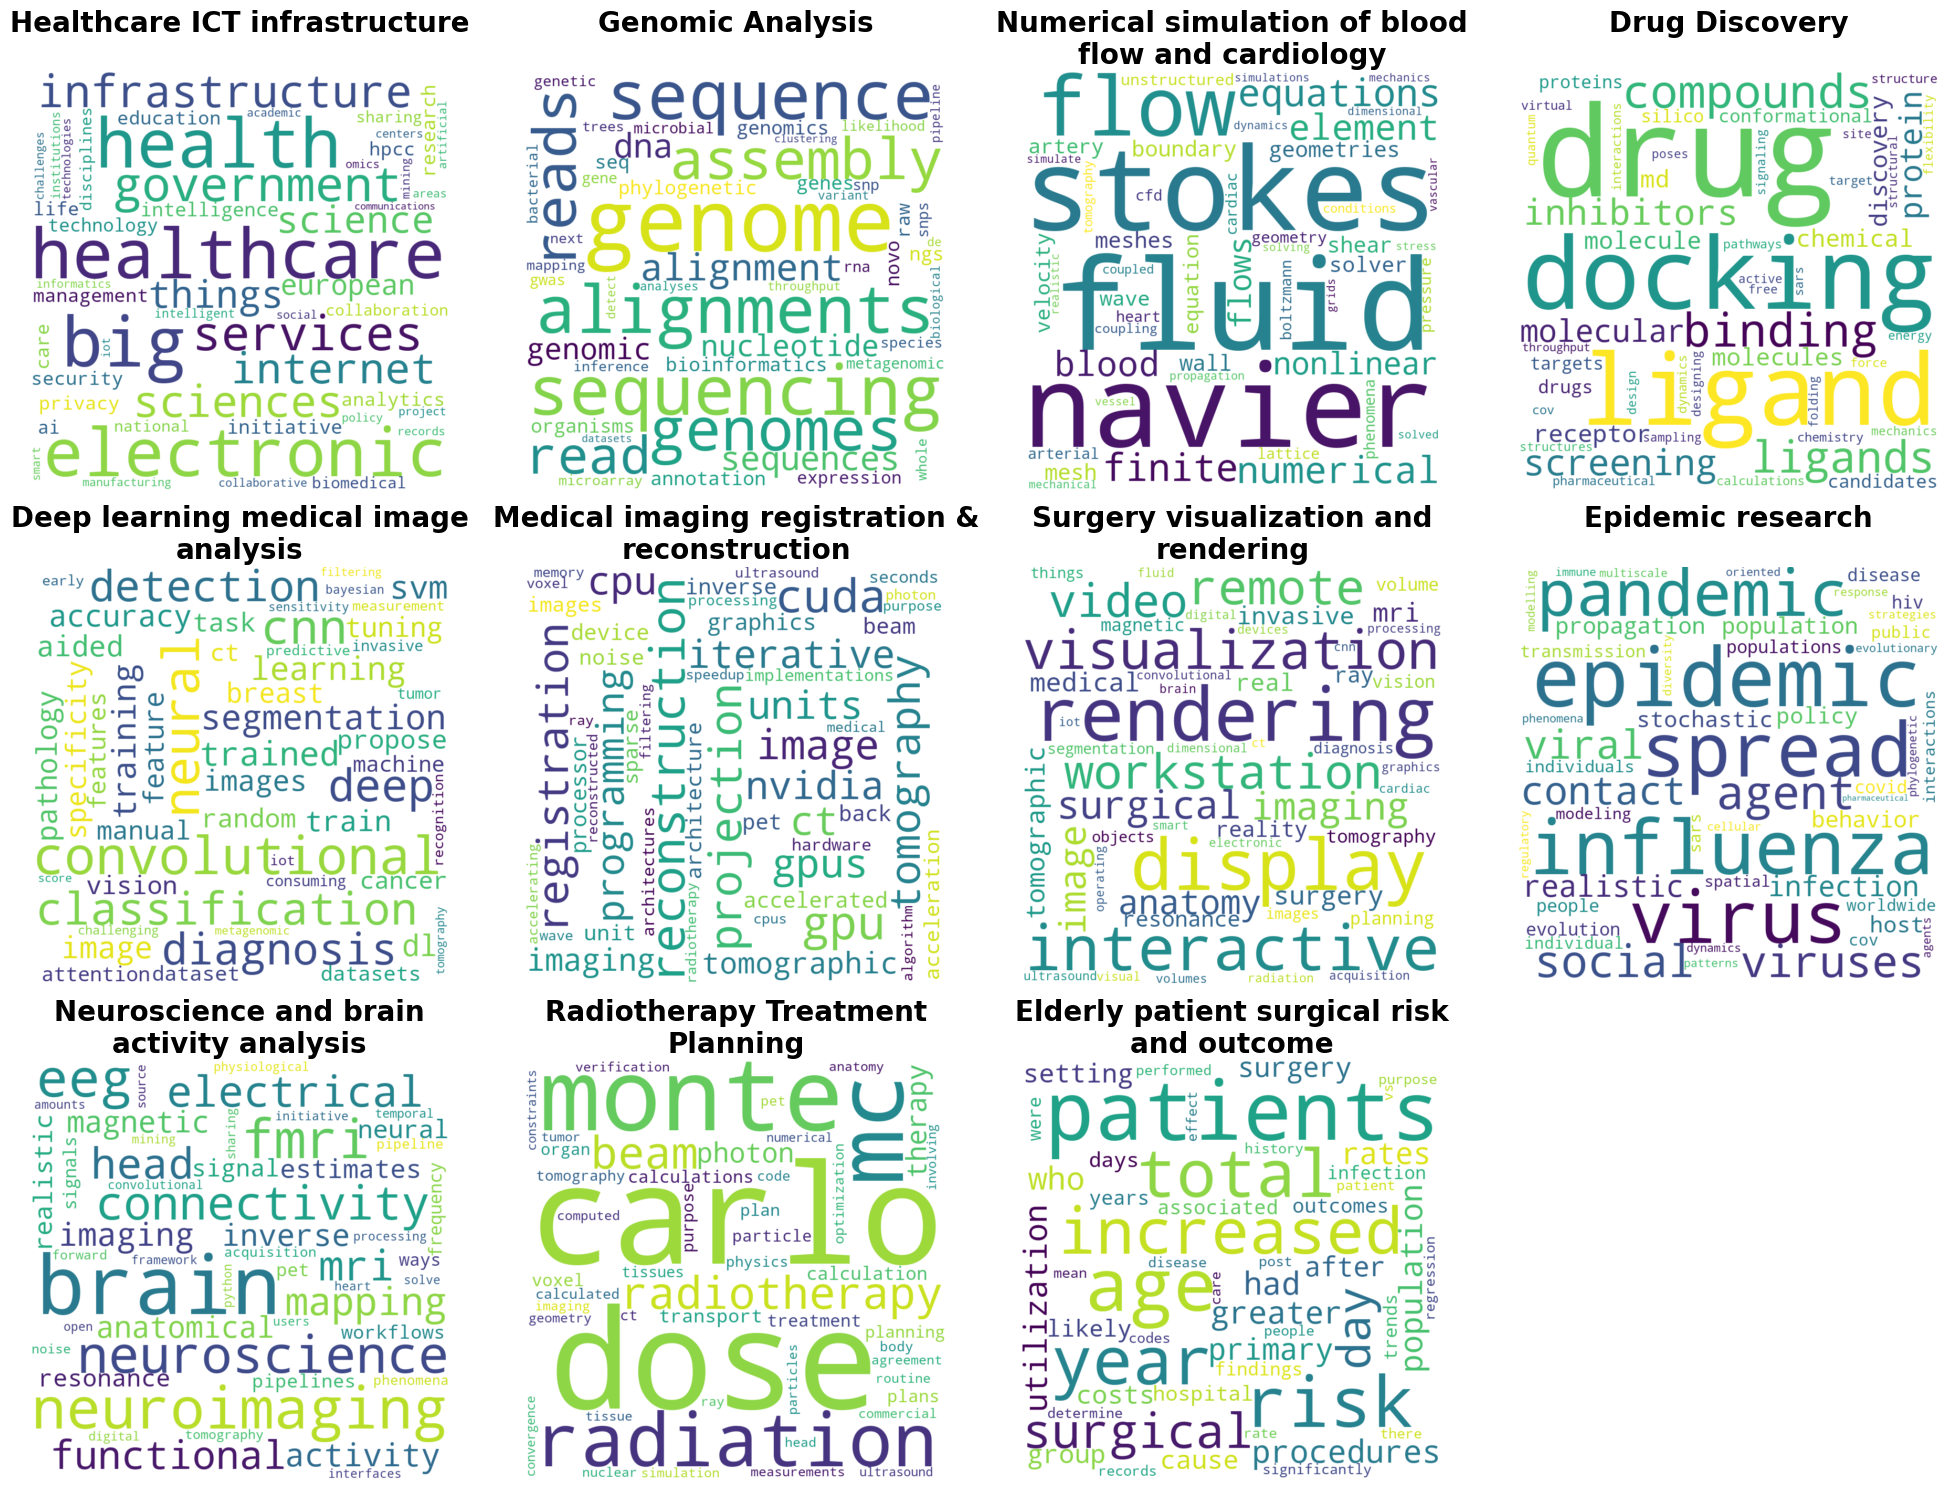

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import textwrap

# Load the CSV file
df = pd.read_csv("output\Top2Vec_output\document_cluster_Top2Vec_doc2vec_topic_words.csv")

# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20,15))
axs = axs.ravel()  # To convert 2D array into 1D

# Loop over the topics
for i in range(len(df)):
    # Split the strings of topic words and scores into lists
    words = df.loc[i, 'topic_words'].strip('[]').replace("'", "").split()
    scores = list(map(float, df.loc[i, 'word_scores'].strip('[]').split()))

    # Create a dictionary with words as keys and scores as values
    word_score_dict = dict(zip(words, scores))

    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(word_score_dict)

    # Plot the word cloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')

    # Wrap the title text after 30 characters
    title_text = df.loc[i, 'health_topic_summary']
    wrapped_title_text = textwrap.fill(title_text, width=30)

    # If title has only one line, add a newline at the end
    if '\n' not in wrapped_title_text:
        wrapped_title_text += '\n'

    # Use the health_topic_summary as the title, make it bold
    axs[i].set_title(wrapped_title_text, fontsize=20, fontweight='bold')

# Remove the last subplot if there are only 11 topics
if len(df) < 12:
    fig.delaxes(axs[-1])

# Adjust the layout
plt.tight_layout()

plt.savefig('word_clouds2.png', dpi=400)

# Show the plot
plt.show()
